In [54]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# 读取数据

In [55]:
df = pd.read_excel('all_label.xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8
0,0.119231,0.168419,0.118964,0.168961,0.119125,0.168832,0.118789,0.168671,0
1,0.115471,0.161739,0.000872,0.002214,0.000313,0.001140,0.000802,0.002416,0
2,0.000823,0.002680,0.115532,0.162396,0.000854,0.002112,0.000376,0.001041,0
3,0.000155,0.001159,0.000846,0.002546,0.115364,0.162475,0.000951,0.001917,0
4,0.000729,0.002200,0.000543,0.001217,0.000848,0.002425,0.114745,0.162085,0
...,...,...,...,...,...,...,...,...,...
85,8.416410,11.336995,8.404203,11.335556,8.411974,11.337828,8.412908,11.339104,8
86,8.561351,11.589335,2.864770,0.002915,0.000877,0.003228,0.007611,2.384417,8
87,0.007849,2.387170,8.559118,11.592402,2.862029,0.003279,0.000982,0.003569,8
88,0.000329,0.004033,0.007512,2.377823,8.536938,11.580039,2.860736,0.003219,8


In [56]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.657733,0.857013,0.657658,0.857031,0.656917,0.857155,0.657403,0.857022,4.000000
std,1.743980,2.308347,1.743338,2.308284,1.741855,2.308152,1.743546,2.308689,2.596454
min,0.000030,0.000339,0.000543,0.000328,0.000012,0.000021,0.000116,0.000002,0.000000
25%,0.001497,0.003267,0.001620,0.002821,0.001559,0.002866,0.001640,0.003113,2.000000
50%,0.024167,0.022598,0.024219,0.022805,0.023796,0.022934,0.023933,0.022283,4.000000
75%,0.360983,0.491933,0.361105,0.492486,0.360623,0.492570,0.360310,0.492199,6.000000
max,8.561351,11.589335,8.559118,11.592402,8.536938,11.580039,8.562588,11.594386,8.000000


In [57]:
df.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.976481,0.529043,0.443957,0.430067,0.464461,0.529199,0.607406,0.435134
1,0.976481,1.000000,0.607264,0.521500,0.464565,0.457631,0.443933,0.521413,0.424403
2,0.529043,0.607264,1.000000,0.976494,0.529241,0.443894,0.429569,0.464033,0.435187
3,0.443957,0.521500,0.976494,1.000000,0.607404,0.521368,0.464077,0.457384,0.424295
4,0.430067,0.464565,0.529241,0.607404,1.000000,0.976427,0.529135,0.444222,0.435189
5,0.464461,0.457631,0.443894,0.521368,0.976427,1.000000,0.607538,0.521822,0.424421
6,0.529199,0.443933,0.429569,0.464077,0.529135,0.607538,1.000000,0.976533,0.435153
7,0.607406,0.521413,0.464033,0.457384,0.444222,0.521822,0.976533,1.000000,0.424367
8,0.435134,0.424403,0.435187,0.424295,0.435189,0.424421,0.435153,0.424367,1.000000


In [58]:
train_data = df.iloc[:, :8].values  # 前八列
train_labels = df.iloc[:, 8].values  # 第九列

train_data = torch.tensor(train_data, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)

In [59]:
train_data

tensor([[1.1923e-01, 1.6842e-01, 1.1896e-01, 1.6896e-01, 1.1912e-01, 1.6883e-01,
         1.1879e-01, 1.6867e-01],
        [1.1547e-01, 1.6174e-01, 8.7238e-04, 2.2142e-03, 3.1311e-04, 1.1397e-03,
         8.0163e-04, 2.4164e-03],
        [8.2309e-04, 2.6797e-03, 1.1553e-01, 1.6240e-01, 8.5387e-04, 2.1121e-03,
         3.7647e-04, 1.0415e-03],
        [1.5469e-04, 1.1588e-03, 8.4560e-04, 2.5460e-03, 1.1536e-01, 1.6248e-01,
         9.5096e-04, 1.9165e-03],
        [7.2899e-04, 2.2002e-03, 5.4322e-04, 1.2169e-03, 8.4780e-04, 2.4249e-03,
         1.1474e-01, 1.6208e-01],
        [1.1923e-01, 1.6874e-01, 1.1892e-01, 1.6925e-01, 1.1878e-01, 1.6942e-01,
         1.1884e-01, 1.6910e-01],
        [1.2167e-01, 1.7367e-01, 4.0926e-02, 8.0166e-04, 1.2165e-05, 6.5197e-04,
         1.5521e-03, 3.2137e-02],
        [1.7011e-03, 3.2508e-02, 1.2162e-01, 1.7462e-01, 4.0190e-02, 4.5283e-04,
         1.1634e-04, 9.9124e-04],
        [5.3251e-04, 1.4664e-03, 1.3997e-03, 3.3054e-02, 1.2108e-01, 1.7416e-01,

In [60]:
train_labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

# 训练

In [61]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, num_classes):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, num_classes)
#     def forward(self, x):
#         out = self.fc1(x)
#         out = self.relu(out)
#         out = self.fc2(out)
#         return out

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.fc5(out)
        return out

input_size = 8  # 输入特征
hidden_size = 100 
num_classes = 9  # 输出类别

learning_rate = 0.001  # 学习率
num_epochs = 200  # 训练轮数

In [62]:
model = NeuralNetwork(input_size, hidden_size, num_classes)
model

NeuralNetwork(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=9, bias=True)
)

In [63]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_history = []

total_steps = len(train_data)
for epoch in range(num_epochs):
    for i in range(total_steps):
        x = train_data[i].unsqueeze(0) 
        labels = train_labels[i].unsqueeze(0)

        outputs = model(x)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item()}')

Epoch [1/200], Step [90/90], Loss: 2.2575533390045166
Epoch [2/200], Step [90/90], Loss: 2.2053935527801514
Epoch [3/200], Step [90/90], Loss: 2.154937505722046
Epoch [4/200], Step [90/90], Loss: 2.1013176441192627
Epoch [5/200], Step [90/90], Loss: 2.043483018875122
Epoch [6/200], Step [90/90], Loss: 1.980309009552002
Epoch [7/200], Step [90/90], Loss: 1.907691478729248
Epoch [8/200], Step [90/90], Loss: 1.824313998222351
Epoch [9/200], Step [90/90], Loss: 1.731040596961975
Epoch [10/200], Step [90/90], Loss: 1.6264299154281616
Epoch [11/200], Step [90/90], Loss: 1.511579990386963
Epoch [12/200], Step [90/90], Loss: 1.3868969678878784
Epoch [13/200], Step [90/90], Loss: 1.2543976306915283
Epoch [14/200], Step [90/90], Loss: 1.1203545331954956
Epoch [15/200], Step [90/90], Loss: 0.9876224398612976
Epoch [16/200], Step [90/90], Loss: 0.8600605130195618
Epoch [17/200], Step [90/90], Loss: 0.7426348328590393
Epoch [18/200], Step [90/90], Loss: 0.638712465763092
Epoch [19/200], Step [90/90

In [64]:
for i in loss_history:
    print(i)

2.2575533390045166
2.2053935527801514
2.154937505722046
2.1013176441192627
2.043483018875122
1.980309009552002
1.907691478729248
1.824313998222351
1.731040596961975
1.6264299154281616
1.511579990386963
1.3868969678878784
1.2543976306915283
1.1203545331954956
0.9876224398612976
0.8600605130195618
0.7426348328590393
0.638712465763092
0.5468443632125854
0.46848151087760925
0.40291762351989746
0.3491736054420471
0.3055607080459595
0.2702878713607788
0.24193120002746582
0.21879364550113678
0.19994916021823883
0.18448707461357117
0.1718023717403412
0.1614239364862442
0.1527305692434311
0.14505045115947723
0.13866636157035828
0.13337036967277527
0.12888729572296143
0.12522771954536438
0.12222448736429214
0.11981737613677979
0.11789185553789139
0.11636953800916672
0.11526130884885788
0.11442236602306366
0.11370338499546051
0.11316614598035812
0.11272841691970825
0.11237818002700806
0.1120542511343956
0.11167190223932266
0.11108119785785675
0.11047659069299698
0.10980400443077087
0.109052613377

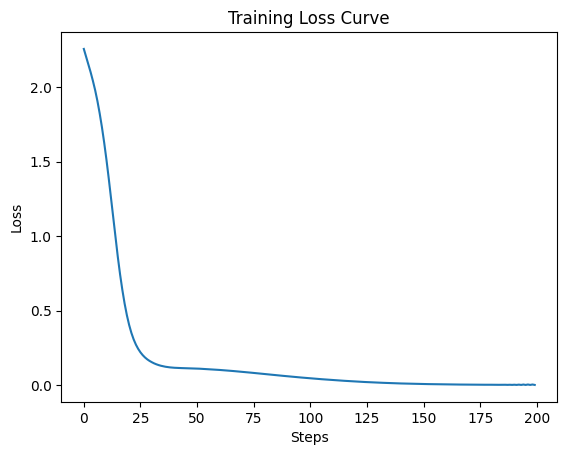

In [65]:
plt.plot(loss_history)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# 保存和加载模型

In [66]:
torch.save(model.state_dict(), 'bp_8class.params')

In [67]:
torch.save(model.state_dict(), 'bp_8class.params')

# 测试

In [68]:
data_test = pd.read_excel("test_label.xlsx", header=None)
test_x = np.array(data_test.iloc[:, 0:8])
test_y = np.array(data_test.iloc[:, 8])
test_data = torch.tensor(test_x, dtype=torch.float32)
test_labels = torch.tensor(test_y, dtype=torch.long)

# 评估模式
clone = NeuralNetwork(input_size, hidden_size, num_classes)
clone.load_state_dict(torch.load('bp_8class.params'))
clone.eval()
with torch.no_grad():
    # 预测测试数据
    outputs = clone(test_data)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(test_data)):
        print(f"Predicted: {predicted[i]}, Actual: {test_labels[i]}")

    # 计算准确率
    correct = (predicted == test_labels).sum().item()
    total = len(test_data)
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100}%")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 3
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 4, Actual: 4
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 5, Actual: 5
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 6, Actual: 6
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 8, Actual: 7
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Predicted: 8, Actual: 8
Accuracy: 66.66666666666666%


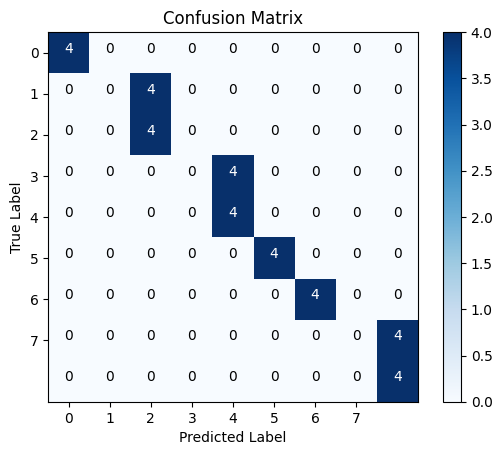

In [69]:
from sklearn.metrics import confusion_matrix

# 计算混淆矩阵
cm = confusion_matrix(test_labels, predicted)

plt.imshow(cm, cmap='Blues')
plt.colorbar()
classes = ['0', '1', '2', '3', '4', '5', '6', '7']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [70]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.00      0.00      0.00         4
           2       0.50      1.00      0.67         4
           3       0.00      0.00      0.00         4
           4       0.50      1.00      0.67         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         4
           8       0.50      1.00      0.67         4

    accuracy                           0.67        36
   macro avg       0.50      0.67      0.56        36
weighted avg       0.50      0.67      0.56        36



In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# 计算预测结果的精确度和召回率
precision, recall, _ = precision_recall_curve(test_labels, predicted)

# 计算PR曲线下的面积
auc_score = auc(recall, precision)

# 绘制PR曲线
plt.plot(recall, precision, label='PR Curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.title('Precision-Recall Curve')
plt.show()


ValueError: multiclass format is not supported